### NOTE: using yahoo finance 

**Lets say, we want to buy a stock. We would prefer buying a stock which is not very volatile and hence avoiding risk. GARCH model can help us in identifying those stock with lesser volatility**

In [21]:
from datetime import datetime, timedelta
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Predicting disney volatility

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 1)

In [3]:
##NOTE: we are getting data from yahoo finance for disney stock and reading it using pandas DataReader

df = yf.download("DIS", start, end)


[*********************100%%**********************]  1 of 1 completed


In [4]:
returns = 100 * df['Close'].pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

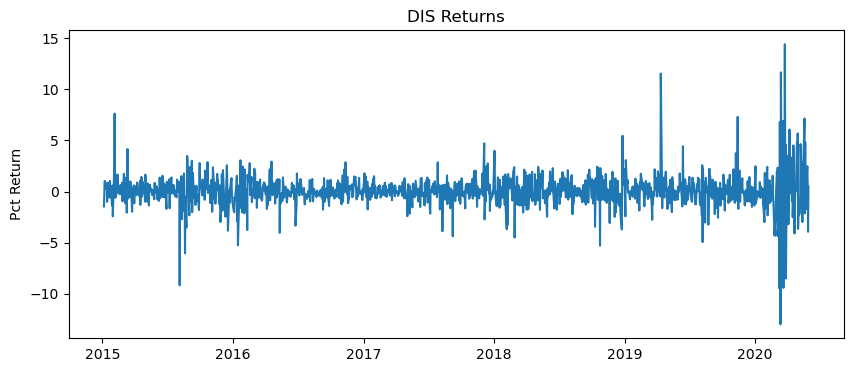

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return')
plt.title('DIS Returns')

## PACF plot

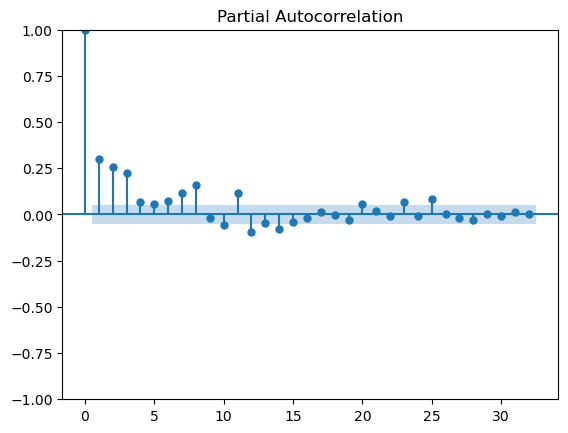

In [6]:
plot_pacf = plot_pacf(returns**2)

## Fit GARCH(3,3) based on the PACF plot

In [7]:
model = arch_model(returns, p = 3, q = 3).fit()
model.summary()


Iteration:      1,   Func. Count:     10,   Neg. LLF: 168228443502.14917
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1010852267.7182248
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2709.567225011008
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2470.4175709389287
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2305.0681913572407
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2348.840111285098
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2405.029829190388
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2350.0768373695055
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2282.086303736167
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2282.0982812277634
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2281.821518488012
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2281.8023192927185
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2281.7888104655767
Iteration:     14,   Func. Count:    139,   Neg. LLF: 22

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2281.78
Distribution:                  Normal   AIC:                           4579.57
Method:            Maximum Likelihood   BIC:                           4621.29
                                        No. Observations:                 1360
Date:                Thu, Aug 08 2024   Df Residuals:                     1359
Time:                        10:08:51   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.9030e-03  4.215e-02     -0.140      0.889 [-8.852e-02,7.672e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5535      0.191      2.903  3.697e-03    [  0.180,  0.927]
alpha[1]       0.0670  3.816e-02      1.755  7.924e-02 [-7.816e-03,  0.142]
alpha[2]       0.2097  9.926e-02      2.113  3.459e-02  [1.520e-02,  0.404]
alpha[3]       0.3226      0.151      2.132  3.302e-02  [2.602e-02,  0.619]
beta[1]    1.1756e-14      0.120  9.785e-14      1.000    [ -0.235,  0.235]
beta[2]        0.0000      0.105      0.000      1.000    [ -0.206,  0.206]
beta[3]        0.2163      0.133      1.628      0.104 [-4.410e-02,  0.477]
===========================================================================

Covariance estimator: robust
"""

**We see that beta1, beta2 values are not that significant as p values are greater than 0.5 which means we can drop them for the moment and try simple ARCH model**

## GARCH(3, 0) = ARCH(3)

In [8]:
model2 = arch_model(returns, p = 3, q = 0).fit()
model2.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3467.902146253506
Iteration:      2,   Func. Count:     16,   Neg. LLF: 52255.690655091705
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1613837.5768248583
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1069891.7767339956
Iteration:      5,   Func. Count:     38,   Neg. LLF: 19300.59154472009
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2418.2561705072562
Iteration:      7,   Func. Count:     53,   Neg. LLF: 11154.579770616077
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2299.805620103604
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2297.0256308780945
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2296.190080748324
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2295.9769301357146
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2295.946080828725
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2295.943460432575
Iteration:     14,   Func. Count:     96,   Neg. LLF: 229

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2295.94
Distribution:                  Normal   AIC:                           4601.88
Method:            Maximum Likelihood   BIC:                           4627.96
                                        No. Observations:                 1360
Date:                Thu, Aug 08 2024   Df Residuals:                     1359
Time:                        10:08:51   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0105  4.011e-02      0.263      0.793 [-6.808e-02,8.914e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8552      0.138      6.199  5.687e-10    [  0.585,  1.126]
alpha[1]       0.0884  4.547e-02      1.945  5.183e-02 [-7.012e-04,  0.178]
alpha[2]       0.2613  9.108e-02      2.869  4.112e-03  [8.283e-02,  0.440]
alpha[3]       0.3591      0.169      2.119  3.406e-02  [2.700e-02,  0.691]
===========================================================================

Covariance estimator: robust
"""

#### Using rolling prediction to see how good ARCH(3) model is 

In [9]:
prediction_rolling = []
test_size = 365

for i in range(test_size):
    train_df = returns[:-(test_size - i)]
    model = arch_model(train_df, p = 3, q = 0).fit()

    pred = model.forecast(horizon = 1)
    # call to forecast function returns a ARCHModelForecast object with has 3 core attribute - variance, mean, and residual_variance
    prediction_rolling.append(np.sqrt(pred.variance.values[0][0]))
    

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3411.939274084598
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4396.996996687311
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1764.075857174942
Iteration:      4,   Func. Count:     32,   Neg. LLF: 74413.0731825277
Iteration:      5,   Func. Count:     39,   Neg. LLF: 8614.687032454036
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1700.0371825614006
Iteration:      7,   Func. Count:     54,   Neg. LLF: 1791.740312648067
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1552.3469751481143
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1552.2829685161535
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1552.282584953228
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1552.2825808445205
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1552.282580125054
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1552.282580125054
            Iterations: 1

In [10]:
prediction_rolling = pd.Series(prediction_rolling, index = returns.index[-365:])

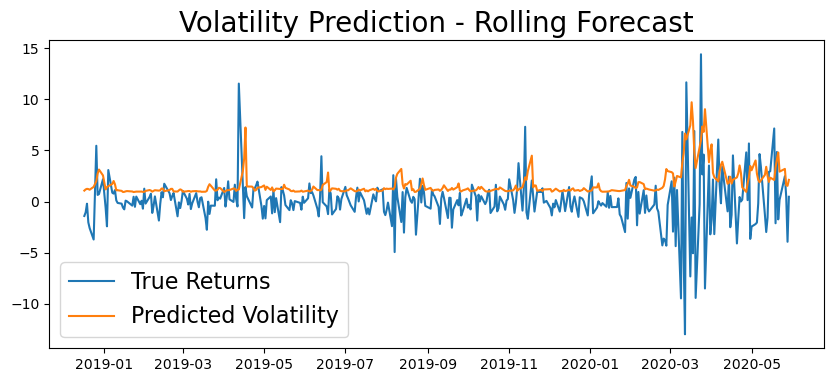

In [11]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(prediction_rolling)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

**We see that whenver the true returns are spikey, the predicted volatility is also very spikey**


## Using Another Stock S&P 500

In [19]:
# USING THIS AS PLOT_PACF IS CREATING ISSUES WITH MAKING PLOT AGAIN, AND I DONT WANT TO RESTART KERNEL AND LOSE RESULTS FOR DISNEY
%reset -f

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'S&P Returns')

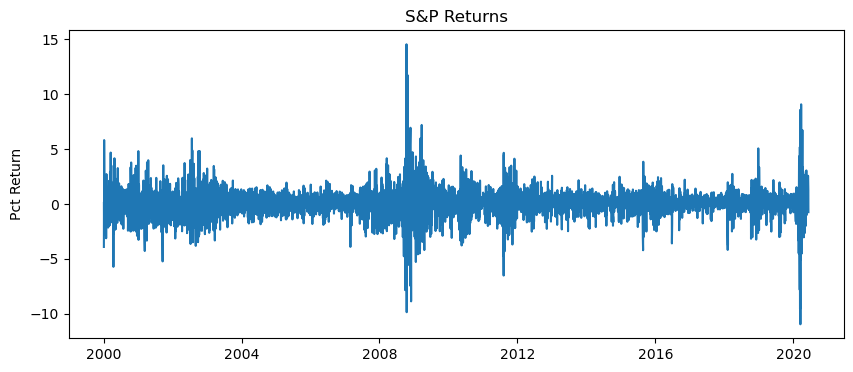

In [22]:
## Repeating the above process

start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

df2 = yf.download("SPY", start, end)
returns2 = 100 * df2['Close'].pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(returns2)
plt.ylabel('Pct Return')
plt.title('S&P Returns')

<Figure size 1000x600 with 0 Axes>

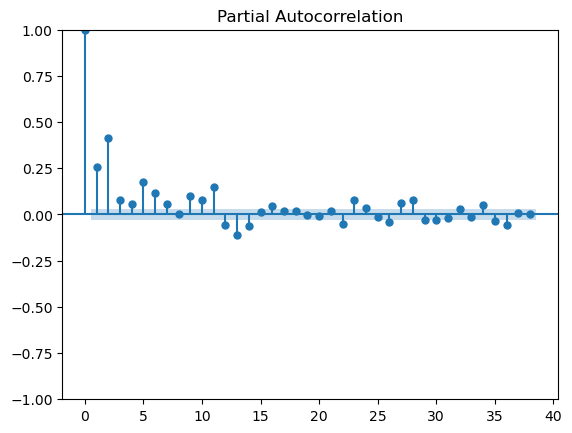

In [23]:
plt.figure(figsize=(10, 6))
plot_pacf(returns2**2)
plt.show()

## GARCH(2,2)

In [24]:
model = arch_model(returns2, p = 2, q = 2).fit()
model.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95280.1569419614
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56723.15523324191
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11217.812427298515
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13360.56509544667
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2150462887.846561
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7229.686305344443
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7085.306114580088
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7055.816908356908
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7052.974656044965
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7052.313034518082
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7052.312559668427
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7052.312558759217
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7052.312558759217
            Iterations: 12
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7052.31
Distribution:                  Normal   AIC:                           14116.6
Method:            Maximum Likelihood   BIC:                           14155.9
                                        No. Observations:                 5140
Date:                Thu, Aug 08 2024   Df Residuals:                     5139
Time:                        10:13:46   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0664  1.096e-02      6.055  1.407e-09 [4.487e-02,8.783e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0406  9.950e-03      4.077  4.566e-05 [2.106e-02,6.007e-02]
alpha[1]       0.0809  2.203e-02      3.671  2.419e-04   [3.769e-02,  0.124]
alpha[2]       0.1328  3.069e-02      4.327  1.511e-05   [7.264e-02,  0.193]
beta[1]        0.3012      0.296      1.017      0.309     [ -0.279,  0.882]
beta[2]        0.4561      0.261      1.749  8.034e-02  [-5.510e-02,  0.967]
============================================================================

Covariance estimator: robust
"""

### The GARCH(2,2) seems to be a good model for S&P as all the alpha and beta coefficient are significant

## Rolling forecast with GARCH(2,2)

In [25]:
prediction_rolling = []
test_size = 365 * 5

for i in range(test_size):
    train_df = returns2[:-(test_size - i)]
    model = arch_model(train_df, p = 2, q = 2).fit()

    pred = model.forecast(horizon = 1)
    # call to forecast function returns a ARCHModelForecast object with has 3 core attribute - variance, mean, and residual_variance
    prediction_rolling.append(np.sqrt(pred.variance.values[0][0]))
    

Iteration:      1,   Func. Count:      8,   Neg. LLF: 33414.7991081118
Iteration:      2,   Func. Count:     20,   Neg. LLF: 18983.332922679445
Iteration:      3,   Func. Count:     32,   Neg. LLF: 1032735345.3768194
Iteration:      4,   Func. Count:     40,   Neg. LLF: 5030.793597076037
Iteration:      5,   Func. Count:     48,   Neg. LLF: 5038.3472452609685
Iteration:      6,   Func. Count:     56,   Neg. LLF: 5066.981168679649
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4937.403664853273
Iteration:      8,   Func. Count:     72,   Neg. LLF: 5003.199168799648
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4920.8579871548245
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4920.285802694818
Iteration:     11,   Func. Count:     94,   Neg. LLF: 4920.39804052397
Iteration:     12,   Func. Count:    102,   Neg. LLF: 4919.958355813324
Iteration:     13,   Func. Count:    109,   Neg. LLF: 4919.950372523176
Iteration:     14,   Func. Count:    116,   Neg. LLF: 4919.949

In [28]:
prediction_rolling = pd.Series(prediction_rolling, index = returns2.index[-365*5:])

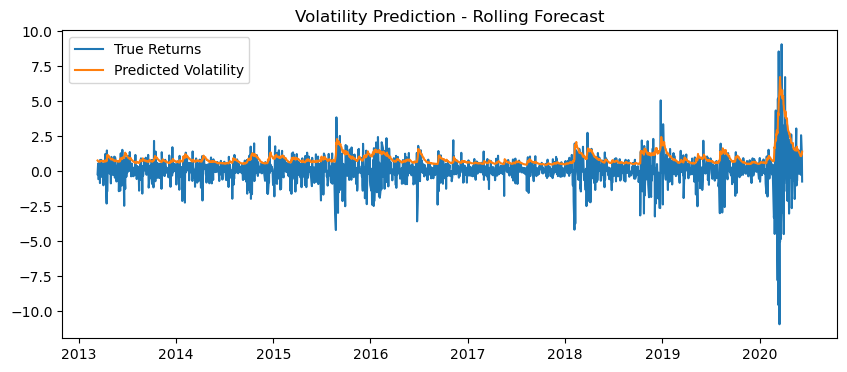

In [29]:
plt.figure(figsize=(10,4))
plt.plot(returns2[-365*5:])
plt.plot(prediction_rolling)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Returns', 'Predicted Volatility'])

## How to know if to use the model and buy the stock?

In [30]:
train = returns2
model = arch_model(returns2, p = 2, q = 2).fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95280.1569419614
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56723.15523324191
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11217.812427298515
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13360.56509544667
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2150462887.846561
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7229.686305344443
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7085.306114580088
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7055.816908356908
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7052.974656044965
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7052.313034518082
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7052.312559668427
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7052.312558759217
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7052.312558759217
            Iterations: 12
 

In [42]:
pred = model.forecast(horizon=7)

future_dates = [returns2.index[-1] + timedelta(days=i) for i in range(1,8)]

pred_ = pd.Series(np.sqrt(pred.variance.values[0]), index=future_dates)


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

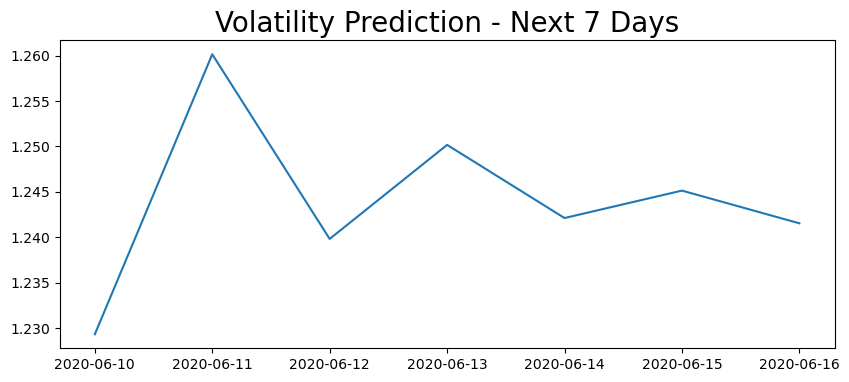

In [43]:
plt.figure(figsize=(10,4))
plt.plot(pred_)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

#### **Overall, we can predict volatility for future and make a judgement based on that**